### Simple LLM powered Chatbot

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

## Reducer
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [4]:
import os 
from dotenv import load_dotenv

load_dotenv()

True

In [5]:
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [6]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [9]:
from langchain_groq import ChatGroq
llm_groq = ChatGroq(model="gemma2-9b-it")
llm_groq.invoke("hello")

AIMessage(content='Hello! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001917316, 'queue_time': 0.242776444, 'total_time': 0.029190043}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--55c049b2-4811-4663-b2ef-75cae7d9ab6c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})

In [10]:
### Start with creating node

def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

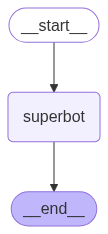

In [11]:
## creating the Graph
graph = StateGraph(State)

## Adding the node
graph.add_node("superbot", superbot)

## Adding the Edges
graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)

## Building the Graph
graph_builder = graph.compile()

## Display the graph
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
### Graph Invocation
graph_builder.invoke({"messages":"hey my name is Hitesh, I like dancing."})

{'messages': [HumanMessage(content='hey my name is Hitesh, I like dancing.', additional_kwargs={}, response_metadata={}, id='5e5d8824-70e3-4348-95c5-e6c4b1732ad3'),
  AIMessage(content="Hi Hitesh! It's nice to meet you. \n\nThat's great that you like dancing! What kind of dancing do you enjoy? 😊  \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 37, 'prompt_tokens': 20, 'total_tokens': 57, 'completion_time': 0.067272727, 'prompt_time': 0.001993664, 'queue_time': 0.246056426, 'total_time': 0.069266391}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--3131834c-79ae-4a40-8be4-7db5e4e50974-0', usage_metadata={'input_tokens': 20, 'output_tokens': 37, 'total_tokens': 57})]}

In [13]:
### Graph Invocation
graph_builder.invoke({"messages":"Tell me about my self ? "})

{'messages': [HumanMessage(content='Tell me about my self ? ', additional_kwargs={}, response_metadata={}, id='5212621a-ef07-42c8-96c0-157702d516bf'),
  AIMessage(content="As an AI, I don't have access to any personal information about you. To tell you about yourself, I need you to tell me!\n\nWhat would you like to share? For example, you could tell me about:\n\n* **Your hobbies and interests:** What do you like to do in your free time?\n* **Your goals and aspirations:** What are you working towards?\n* **Your favorite things:** What are some of your favorite books, movies, or songs?\n* **Your personality traits:** What are some words that describe you?\n\n\nThe more you tell me, the better I can understand you! 😊 \n\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 135, 'prompt_tokens': 16, 'total_tokens': 151, 'completion_time': 0.245454545, 'prompt_time': 0.001917265, 'queue_time': 0.247163613, 'total_time': 0.24737181}, 'model_name': 'gemma2-9b-it',

In [14]:
## Streaming the responses 
for event in graph_builder.stream({"messages":"hello my name is Hitesh"}):
    print(event)

{'superbot': {'messages': [AIMessage(content="Hello Hitesh, it's nice to meet you!\n\nIs there anything I can help you with today?\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 15, 'total_tokens': 41, 'completion_time': 0.047272727, 'prompt_time': 0.002906002, 'queue_time': 0.254332047, 'total_time': 0.050178729}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--f54c62a4-4958-43f4-a389-e9b93325e926-0', usage_metadata={'input_tokens': 15, 'output_tokens': 26, 'total_tokens': 41})]}}
